In [ ]:
import pandas as pd

In [ ]:
# Buid a machine learning model
# Take the log of the pricing data to make it stationary
# Apply an ARIMA or SARIMA model to predict
# Build upon the prediction for the classification (buy, sell or hold)^
# Seperate tables or filter within one big table
# Do an EDA for all the different share prices

# Input parameters:
# Open price
# Close price
# Day high
# Day low
# Adj. close price

In [ ]:
data_df = pd.read_csv("shareprices.csv")

In [ ]:
data_df.head(20)

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
0,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681.0
1,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037.0
2,A,45846,2019-04-03,81.54,82.02,81.46,81.94,78.70,2141025.0
3,A,45846,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112.0
4,A,45846,2019-04-05,81.19,81.92,81.05,81.47,78.25,1502875.0
5,A,45846,2019-04-08,81.57,81.71,80.58,81.69,78.46,783350.0
6,A,45846,2019-04-09,81.56,81.72,81.27,81.42,78.20,1254742.0
7,A,45846,2019-04-10,81.45,82.24,81.45,81.68,78.45,982886.0
8,A,45846,2019-04-11,81.88,81.92,80.89,81.08,77.87,1071479.0
9,A,45846,2019-04-12,81.43,82.06,80.90,80.98,77.77,1249295.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078788 entries, 0 to 1078787
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Ticker      1078788 non-null  object 
 1   SimFinId    1078788 non-null  int64  
 2   Date        1078788 non-null  object 
 3   Open        1078787 non-null  float64
 4   High        1078787 non-null  float64
 5   Low         1078787 non-null  float64
 6   Close       1078787 non-null  float64
 7   Adj. Close  1078787 non-null  float64
 8   Volume      1078787 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 74.1+ MB


In [ ]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.info()

ValueError: time data "2023" doesn't match format "%Y-%m-%d", at position 1078787. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
len(data_df.Ticker.unique())

1042

In [ ]:
# TO DO : choose 5 tickers & eliminate rest


In [ ]:
#create label

df_A = data_df[data_df["Ticker"]=="A"]
df_A.sort_values(by="Date")

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume
0,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681.0
1,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037.0
2,A,45846,2019-04-03,81.54,82.02,81.46,81.94,78.70,2141025.0
3,A,45846,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112.0
4,A,45846,2019-04-05,81.19,81.92,81.05,81.47,78.25,1502875.0
...,...,...,...,...,...,...,...,...,...
1235,A,45846,2024-02-27,131.45,133.18,130.87,132.55,131.63,1772701.0
1236,A,45846,2024-02-28,139.88,139.88,136.35,137.01,136.06,2537079.0
1237,A,45846,2024-02-29,137.51,138.03,135.86,137.36,136.41,2622608.0
1238,A,45846,2024-03-01,137.03,139.15,134.67,139.06,138.10,1531000.0


In [ ]:
# Select only necessary columns
df = df_A[['Ticker', 'Date', 'Close']]

# Sort by Ticker and Date to ensure chronological order
df = df.sort_values(by=['Ticker', 'Date'])

# Reset index
df.reset_index(drop=True, inplace=True)

print(df.head())


  Ticker       Date  Close
0      A 2019-04-01  81.56
1      A 2019-04-02  81.14
2      A 2019-04-03  81.94
3      A 2019-04-04  80.83
4      A 2019-04-05  81.47


In [ ]:
# Define the number of lag days
n_lags = 3

# Create lag columns
for i in range(1, n_lags + 1):
    df[f'd-{i}'] = df.groupby('Ticker')['Close'].shift(i)

print(df.head())

  Ticker       Date  Close    d-1    d-2    d-3
0      A 2019-04-01  81.56    NaN    NaN    NaN
1      A 2019-04-02  81.14  81.56    NaN    NaN
2      A 2019-04-03  81.94  81.14  81.56    NaN
3      A 2019-04-04  80.83  81.94  81.14  81.56
4      A 2019-04-05  81.47  80.83  81.94  81.14


In [ ]:
df.dropna(inplace=True)# Drop NaN values and reset index
df.reset_index(drop=True, inplace=True)  # Fixes index misalignment

print(df.head())  # Confirm no NaN values remain


  Ticker       Date  Close    d-1    d-2    d-3
0      A 2019-04-04  80.83  81.94  81.14  81.56
1      A 2019-04-05  81.47  80.83  81.94  81.14
2      A 2019-04-08  81.69  81.47  80.83  81.94
3      A 2019-04-09  81.42  81.69  81.47  80.83
4      A 2019-04-10  81.68  81.42  81.69  81.47


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Ticker', 'Date', 'Close'])  # Features: d-1, d-2, d-3
y = df['Close']  # Target: Next day's Close price

print(X.head())  # Check feature matrix
print(y.head())  # Check target values

     d-1    d-2    d-3
0  81.94  81.14  81.56
1  80.83  81.94  81.14
2  81.47  80.83  81.94
3  81.69  81.47  80.83
4  81.42  81.69  81.47
0    80.83
1    81.47
2    81.69
3    81.42
4    81.68
Name: Close, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train-test split (time-based, no shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 1.50
MSE: 4.39
RMSE: 2.10


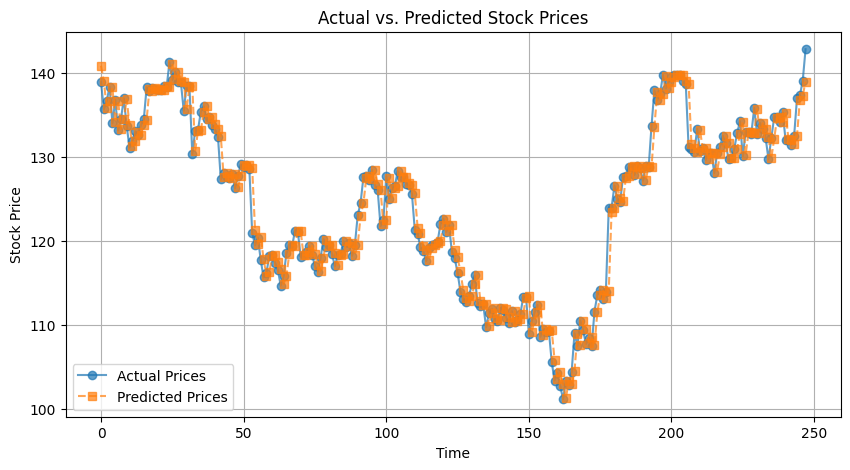

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Prices', linestyle='--', marker='s', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# Get the most recent data row
latest_data = df.iloc[-1][['d-1', 'd-2', 'd-3']].values.reshape(1, -1) # We will need to integrate the API call here to get the latest data from the website
# Predict the next day's closing price
next_day_price = model.predict(latest_data)[0]

print(f'Predicted next day closing price: {next_day_price:.2f}')

Predicted next day closing price: 138.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import requests
import logging

logging.basicConfig(
    filename='app.log',
    filemode='w',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

class InvalidInitialDate(Exception):
  pass

class InvalidFinalDate(Exception):
  pass

class PySimFin:
  def __init__(self):
    self.__api_key='1c8ac883-1180-4ed0-93cc-cfff0a297631'
    self.__headers = {'accept':'application/json','Authorization': f'{self.__api_key}'}
    logging.info('API Key and authenticator set up correctly.')
  def get_share_prices(self,ticker:str,start:str,end:str):
    logging.info('Checking the initial and final dates to prevent errors in the web.')
    if start>end or start<'2018-03-05':
      raise InvalidInitialDate('Cannot input initial date greater than final date nor before 2018-03-05')
    elif end<start or end>'2025-03-04':
      raise InvalidFinalDate('Cannot input final date lower than initial date nor after 2025-03-04')
    else:
      logging.info('Correct input dates, getting the response from the web.')
      self.__url=f'https://backend.simfin.com/api/v3/companies/prices/verbose?ticker={ticker}&start={start}&end={end}'
      response=requests.get(self.__url,headers=self.__headers)
      if response.status_code == 200:
        data = response.json()
        data_list=[]
        #latest_data2 = df.iloc[-1][[ticker,end,data[0]['data'][-1]['Last Closing Price']]].values.reshape(1, -1)
        #next_day_price2 = model.predict(latest_data2)[0]
        if data!=[]:
          for i in data[0]['data']:
            data_list.append(i['Last Closing Price'])
          return f'The closing prices for the given dates are: {data_list}'#\nThe predicted closing price for the next day is:{next_day_price2:.2f}.'
        else:
          return f'No data available between {start} and {end}.'
      else:
        logging.error(f'Unable to retrieve data, error:{response.status_code}. Please check the definition of these mistakes to correct your input data:\n400 - Bad request\n404 - API not found\n429 - Rate limits exceeded, see section Rate Limits.')
  #def get_financial_statement(self,ticker:str,start:str,end:str):
    #self.url=f'https://backend.simfin.com/api/v3/companies/financials/statements/compact?id=&ticker={self.ticker}&start={self.start}&end={self.end}'
    #headers = {'Authorization': f'Bearer {self.api_key}'}
    #response=requests.get(self.url,headers=headers)

In [ ]:
input1=PySimFin()
input1.get_share_prices('AAPL','2021-01-27','2021-01-31')

'The closing prices for the given dates are: [142.06, 137.09, 131.96]'

In [ ]:
def data_transform(date,d1,d2,d3):
  date=pd.todatetime(date)